In [1]:
%matplotlib inline
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv('data/games.csv', lineterminator='\n')

In [3]:
df.shape

(5158, 18)

In [4]:
df.head().transpose()

,0,1,2,3,4
title,10 Second Ninja X,1000 Top Rated,1001 Spikes,100ft Robot Golf,101 Ways to Die
platform,PlayStation 4,PlayStation 4,PlayStation 4,PlayStation 4,PlayStation 4
developer,GameDesignDan,Top Rated,Nicalis,No Goblin,4 Door Lemon
genre,"['Action', 'Platformer', '2D']","['Miscellaneous', 'Party / Minigame']","['Action', 'Platformer', 'Platformer', '2D', '...","['Sports', 'Individual', 'Golf', 'Arcade']","['Action', 'Platformer', '2D']"
rating,T,NaN,T,E10+,T
release_date,2016-07-19,2017-06-27,2014-06-03,2017-09-27,2016-03-22
summary,If you want a cheesy story to go along with a ...,"This game is a puzzle game, but it's more like...",If you miss the crippling difficulty of the NE...,100ft Robot Golf is a real-time golf game thro...,A game that makes me laugh and want to play mo...
meta_score,76,0,78,56,60
meta_overview,Generally favorable reviews,No score yet,Generally favorable reviews,Mixed or average reviews,Mixed or average reviews
meta_pos,11,0,6,3,1


In [5]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
sns.set_style(style='whitegrid')

### General

__Which console has more games titles ?__

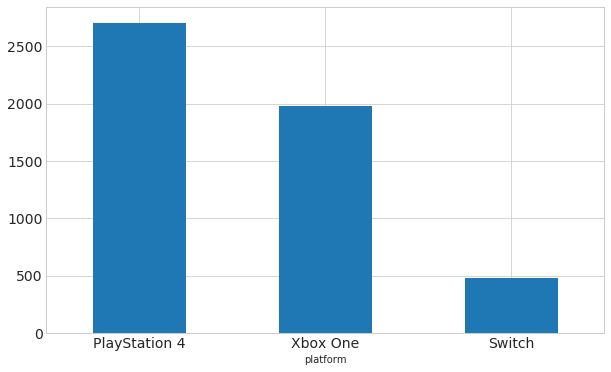

In [6]:
df.groupby('platform')['title'].count().sort_values(ascending=False).plot.bar(figsize=(10, 6), rot=0);

Given release date let's add two columns with year and month information

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year

EA Sports appears also as 'EA Sports, EA Vancouver' and 'EA Vancouver'. Let's unify the names

In [7]:
df.loc[df['developer'] == 'EA Sports, EA Vancouver', 'developer'] = 'EA Sports'
df.loc[df['developer'] == 'EA Vancouver', 'developer'] = 'EA Sports'

In order to perform analysis related to scores, we need to use those games with reviews

In [8]:
tmp = df.loc[(df['meta_overview'] != 'No score yet') & (df['user_overview'] != 'No user score yet')].copy()

__Which console has best average scores ?__

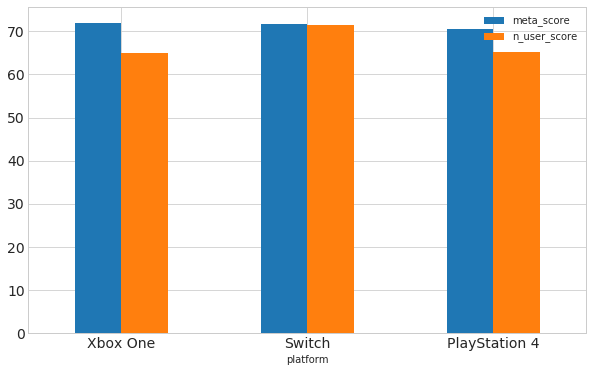

In [10]:
tmp.groupby('platform')['meta_score', 'n_user_score'].mean().sort_values('meta_score', ascending=False).plot.bar(figsize=(10, 6), rot=0);

Let's compare metacritics scores vs user scores. (metacritics scores are made by specialized critics sites while user scores by people registered on metacritic.com)

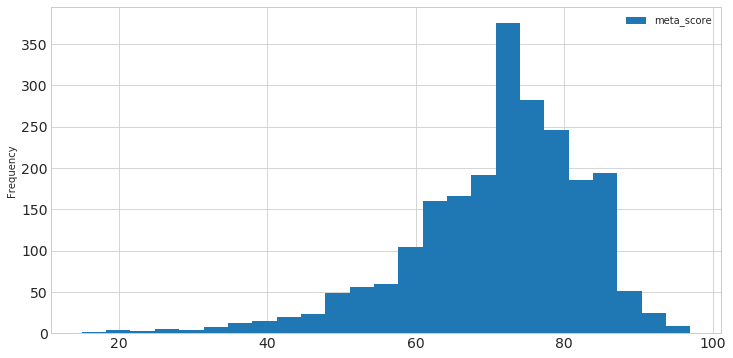

In [11]:
tmp[['meta_score']].plot.hist(bins=25, figsize=(12, 6));

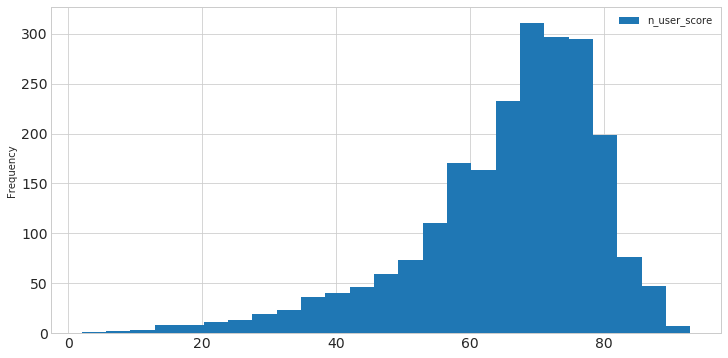

In [12]:
tmp[['n_user_score']].plot.hist(bins=25, figsize=(12, 6));

Meta scores tend to be higher than user scores

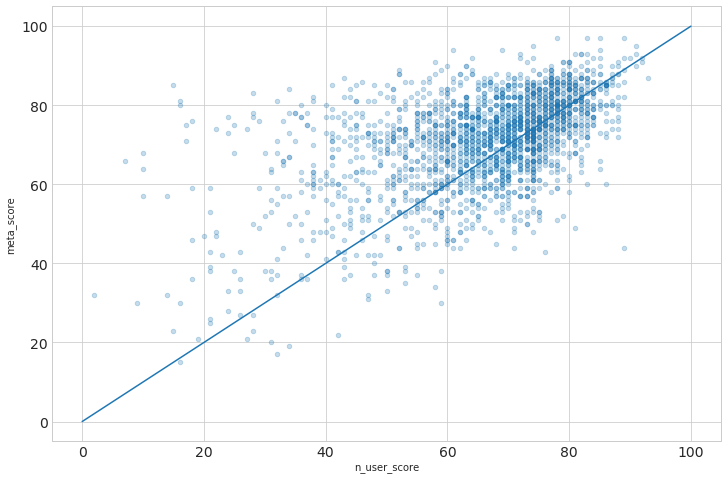

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot([0, 100], [0, 100])
tmp.plot.scatter(x='n_user_score', y='meta_score', ax=ax, alpha=0.25);

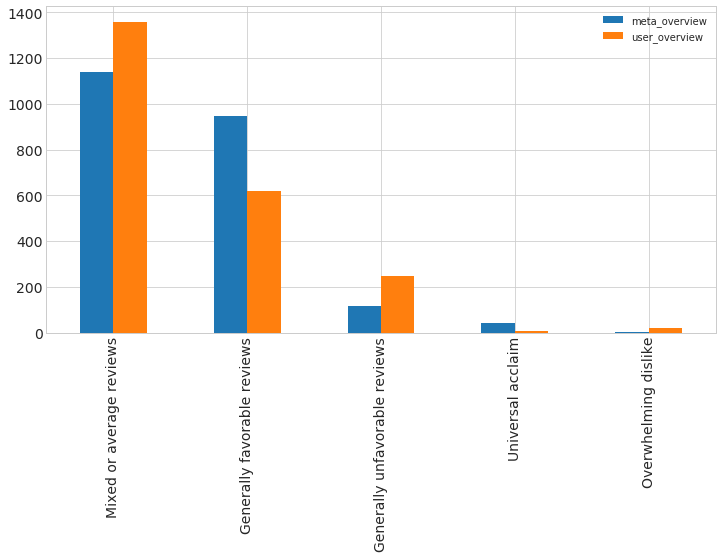

In [14]:
mo = tmp.groupby('meta_overview')['title'].count()
mo.name = 'meta_overview'
uo = tmp.groupby('user_overview')['title'].count()
uo.name = 'user_overview'
pd.concat([mo, uo], axis=1).sort_values('meta_overview', ascending=False).plot.bar(figsize=(12, 6));

We confirm that there are more 'Generally favorable reviews' in meta scores and more 'Generally unfavorable reviews' in user scores. <br>Users tend to be more critic in their reviews than specialized sites (paid reviews ?)

__How many new titles were released since 2014 ?__

Here we compare just PlayStation 4 and Xbox One because both platforms were announced the same year (2013). On the other hand Nintendo Switch in 2016

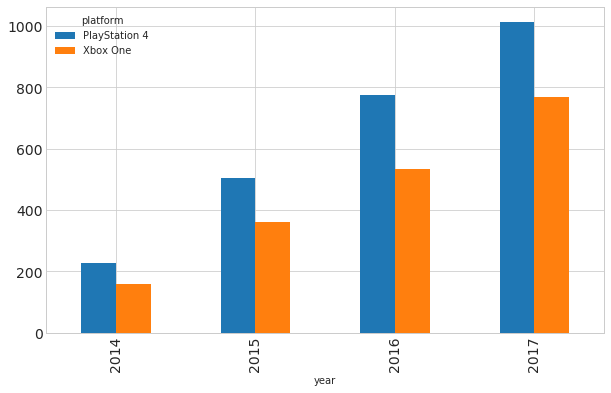

In [15]:
df.loc[(df['year'] > 2013) & (df['year'] < 2018) & (df['platform'] != 'Switch')].groupby(['year', 'platform'])['title'].count().unstack().plot.bar(figsize=(10, 6));

__When are new titles released ?__

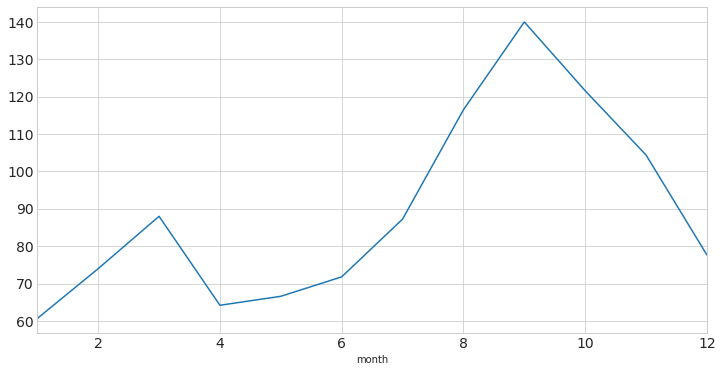

In [16]:
df.groupby(['year', 'month'])['title'].count().groupby('month').mean().plot(figsize=(12, 6));

There's a peak between August and November (anticipating christmas sales?)

__How did average scores evolve since 2014 ?__

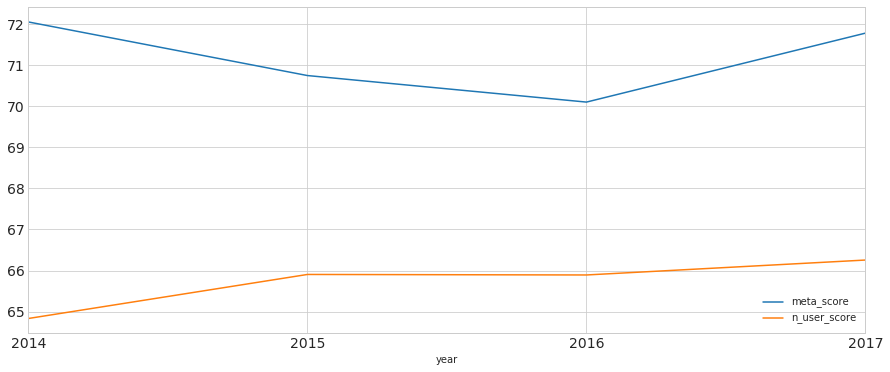

In [17]:
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot(1, 1, 1)
tmp.loc[(tmp['year'] > 2013) & (tmp['year'] < 2018), ('meta_score', 'year')].groupby('year').mean().plot(ax = ax, xticks=np.arange(2014, 2018, 1))
tmp.loc[(tmp['year'] > 2013) & (tmp['year'] < 2018), ('n_user_score', 'year')].groupby('year').mean().plot(ax = ax, xticks=np.arange(2014, 2018, 1));

No big changes

### Best games

__How many titles per console have metacritic score greater than 85?__

In [18]:
tmp.loc[tmp['meta_score'] >= 85].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    112
Xbox One          85
Switch            22
Name: title, dtype: int64

__How many titles per console have user score greater than 85?__

In [19]:
tmp.loc[tmp['n_user_score'] >= 85].groupby('platform')['title'].count().sort_values(ascending=False)

platform
PlayStation 4    29
Xbox One         24
Switch           18
Name: title, dtype: int64

Let's add a column with the difference between meta and user score

In [20]:
tmp['dif'] = tmp['meta_score'] - tmp['n_user_score']

In [21]:
ps4 = tmp.loc[tmp['platform'] == 'PlayStation 4']
xone = tmp.loc[tmp['platform'] == 'Xbox One']
switch = tmp.loc[tmp['platform'] == 'Switch']

#### PlayStation 4

__What are the best 20 titles according to metacritic score?__

In [22]:
ps4.sort_values('meta_score', ascending=False).reset_index(drop=True)[['title', 'meta_score', 'n_user_score', 'dif']][:20]

,title,meta_score,n_user_score,dif
0,Grand Theft Auto V,97,83.0,14.0
1,The Last of Us Remastered,95,91.0,4.0
2,XCOM 2: War of the Chosen,94,61.0,33.0
3,Persona 5,93,91.0,2.0
4,Metal Gear Solid V: The Phantom Pain,93,82.0,11.0
5,Uncharted 4: A Thief's End,93,83.0,10.0
6,Bloodborne,92,89.0,3.0
7,Undertale,92,64.0,28.0
8,The Witcher 3: Wild Hunt,92,92.0,0.0
9,Shadow of the Colossus,92,90.0,2.0


For a lot of those titles there's a big difference between what meta critics and users think

__What are the best 20 titles according to user score?__

In [23]:
ps4.sort_values('n_user_score', ascending=False).reset_index(drop=True)[['title', 'n_user_score', 'meta_score', 'dif']][:20]

,title,n_user_score,meta_score,dif
0,Bloodborne: The Old Hunters,93.0,87,-6.0
1,The Witcher 3: Wild Hunt,92.0,92,0.0
2,The Last of Us Remastered,91.0,95,4.0
3,Persona 5,91.0,93,2.0
4,Shadow of the Colossus,90.0,92,2.0
5,Bloodborne,89.0,92,3.0
6,Dark Souls III,89.0,89,0.0
7,AO Tennis,89.0,44,-45.0
8,The Witcher 3: Wild Hunt - Blood and Wine,88.0,91,3.0
9,NieR: Automata,88.0,88,0.0


With exception of AO Tennis, meta critics and users scores seem to be similar

__What are the top 10 titles most overrated by metacritic? (user point of view)__

In [24]:
ps4.sort_values('dif', ascending=False)[:10][['title', 'meta_score', 'n_user_score', 'dif']].reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,NBA 2K18,80,16.0,64.0
1,Star Wars Battlefront II,68,10.0,58.0
2,Call of Duty: Infinite Warfare - Sabotage,76,18.0,58.0
3,Pinball FX 2: Star Wars Pinball - Rogue One,74,22.0,52.0
4,Call of Duty: Infinite Warfare - Continuum,75,25.0,50.0
5,Super Rude Bear Resurrection,78,28.0,50.0
6,FIFA 18,84,34.0,50.0
7,Call of Duty: WWII - The Resistance,73,24.0,49.0
8,Call of Duty: Black Ops III - Salvation,74,27.0,47.0
9,Chime Sharp,76,29.0,47.0


__What are the top 10 titles most underrated by metacritic? (user point of view)__

In [25]:
ps4.sort_values('dif')[:10][['title', 'meta_score', 'n_user_score', 'dif']].reset_index(drop=True)

,title,meta_score,n_user_score,dif
0,AO Tennis,44,89.0,-45.0
1,Dead or Alive Xtreme 3: Fortune,43,76.0,-33.0
2,Calvino Noir,44,71.0,-27.0
3,Shadwen,51,75.0,-24.0
4,Anima: Gate of Memories,52,75.0,-23.0
5,Armikrog,50,73.0,-23.0
6,Mark McMorris Infinite Air,50,73.0,-23.0
7,Kill Strain,53,75.0,-22.0
8,Red Goddess: Inner World,49,71.0,-22.0
9,Dying: Reborn,38,59.0,-21.0


Let's see more information about AO Tennis

In [26]:
ps4.loc[ps4['title'] == 'AO Tennis'].transpose()

,159
title,AO Tennis
platform,PlayStation 4
developer,Big Ant Studios
genre,"['Sports', 'Individual', 'Tennis']"
rating,NaN
release_date,2018-01-16 00:00:00
summary,AO Tennis is the most advanced tennis game eve...
meta_score,44
meta_overview,Generally unfavorable reviews
meta_pos,0


It's a new game with few critics reviews

### Exclusive games

In [57]:
ps4_list = set(df.loc[df['platform'] == 'PlayStation 4', 'title'])
xone_list = set(df.loc[df['platform'] == 'Xbox One', 'title'])
switch_list = set(df.loc[df['platform'] == 'Switch', 'title'])

#### PlayStation 4

__How many exclusive games PlayStation 4 got?__

In [86]:
ps4_exclusives = tmp.loc[tmp['title'].isin(list(ps4_list.difference(xone_list).difference(switch_list))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(ps4_exclusives)

506

__What are the top 25 exclusives PlayStation 4 games?__

In [87]:
ps4_exclusives[:25]

,title,n_user_score,meta_score
0,Bloodborne: The Old Hunters,93.0,87
1,The Last of Us Remastered,91.0,95
2,Persona 5,91.0,93
3,Shadow of the Colossus,90.0,92
4,Bloodborne,89.0,92
5,NieR: Automata,88.0,88
6,Yakuza 0,88.0,85
7,Wipeout: Omega Collection,87.0,85
8,Crash Bandicoot N. Sane Trilogy,87.0,80
9,Ratchet & Clank,86.0,85


__How many exlusive PlayStation 4 games have user score equal or greater than 80 ?__

In [88]:
len(ps4_exclusives.loc[ps4_exclusives['n_user_score'] >= 80])

58

#### Xbox One

__How many exclusive games Xbox One got?__

In [89]:
xone_exclusives = tmp.loc[tmp['title'].isin(list(xone_list.difference(ps4_list).difference(switch))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(xone_exclusives)

128

__What are the top 25 exclusives Xbox One games?__

In [90]:
xone_exclusives[:25]

,title,n_user_score,meta_score
0,Hyperdrive Massacre,86.0,73
1,Ori and the Blind Forest,85.0,88
2,Cuphead,84.0,86
3,Lego Marvel Super Heroes 2,83.0,75
4,Forza Horizon 2,83.0,86
5,Silence: The Whispered World 2,82.0,66
6,Action News Heroes,81.0,49
7,"LEVEL 22, Gary's Misadventures",81.0,68
8,Raiden V,81.0,75
9,Shape Up,80.0,58


__How many exlusive Xbox One games have user score equal or greater than 80 ?__

In [91]:
len(xone_exclusives.loc[xone_exclusives['n_user_score'] >= 80])

14

#### Switch

__How many exclusive games Switch got?__

In [92]:
switch_exclusives = tmp.loc[tmp['title'].isin(list(switch_list.difference(ps4_list).difference(xone_list))), ('title', 'n_user_score', 'meta_score')].sort_values('n_user_score', ascending=False).reset_index(drop=True)
len(switch_exclusives)

89

__What are the top 25 exclusives Switch games?__

In [93]:
switch_exclusives[:25]

,title,n_user_score,meta_score
0,Super Mario Odyssey,89.0,97
1,Gorogoa,88.0,82
2,SteamWorld Heist: Ultimate Edition,88.0,90
3,Disgaea 5 Complete,87.0,81
4,Golf Story,86.0,78
5,Mario + Rabbids: Kingdom Battle,86.0,85
6,The Legend of Zelda: Breath of the Wild,85.0,97
7,Mario Kart 8 Deluxe,85.0,92
8,Splatoon 2,84.0,83
9,"Snipperclips Plus: Cut It Out, Together!",84.0,84


__How many exlusive Switch games have user score equal or greater than 80 ?__

In [94]:
len(switch_exclusives.loc[switch_exclusives['n_user_score'] >= 80])

28

### Developers

#### PlayStation 4

__Who are the top 10 developers with more released titles?__

In [177]:
ps4.groupby('developer')['title'].count().sort_values(ascending=False)[:10]

developer
Telltale Games      48
Capcom              28
EA Sports           17
Omega Force         16
Square Enix         16
Zen Studios         16
Ubisoft Montreal    14
TT Games            11
Io Interactive       8
Arc System Works     8
Name: title, dtype: int64

__Does quantity mean quality?__

In [167]:
dev = pd.concat([ps4.groupby('developer')['title'].count(), ps4.groupby('developer')['n_user_score'].mean(), ps4.groupby('developer')['meta_score'].mean()], axis=1)
dev.columns = ['count', 'n_user_score_avg', 'meta_score_avg']
dev.sort_values('count', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
Telltale Games,48,62.645833,72.895833
Capcom,28,69.357143,74.785714
EA Sports,17,49.058824,73.352941
Zen Studios,16,56.000000,79.125000
Omega Force,16,70.937500,71.062500
Square Enix,16,68.687500,75.937500
Ubisoft Montreal,14,70.642857,74.785714
TT Games,11,71.818182,72.818182
Arc System Works,8,76.500000,77.625000


It seems that not

__Who are the best 10 developers according to user score (at least 4 released titles)?__

In [159]:
dev.loc[dev['count'] >= 4].sort_values('n_user_score_avg', ascending=False)[:10]

,count,n_user_score_avg,meta_score_avg
developer,,,
From Software,6,83.833333,84.666667
DONTNOD Entertainment,6,83.500000,80.166667
Deck Nine Games,4,79.000000,76.250000
Spike Chunsoft,6,78.333333,77.000000
Sega,4,77.250000,82.500000
Arc System Works,8,76.500000,77.625000
CyberConnect2,5,76.400000,71.200000
Housemarque,4,76.250000,84.500000
Techland,4,76.250000,75.250000


__What are the titles that gave them such a good reputation ?__

From Software

In [160]:
ps4.loc[ps4['developer'] == 'From Software', 'title'].reset_index(drop=True)

0                                 Bloodborne
1                Bloodborne: The Old Hunters
2    Dark Souls II: Scholar of the First Sin
3                             Dark Souls III
4          Dark Souls III: Ashes of Ariandel
5            Dark Souls III: The Ringed City
Name: title, dtype: object

DONTNOD Entertainment

In [161]:
ps4.loc[ps4['developer'] == 'DONTNOD Entertainment', 'title'].reset_index(drop=True)

0                              Life is Strange
1       Life is Strange: Episode 1 - Chrysalis
2     Life is Strange: Episode 2 - Out of Time
3    Life is Strange: Episode 3 - Chaos Theory
4       Life is Strange: Episode 4 - Dark Room
5       Life is Strange: Episode 5 - Polarized
Name: title, dtype: object

__Who are the top 10 developers whose titles are on average more overrated by metacritic (at least 4 released titles) ?__

In [174]:
dev = pd.concat([ps4.groupby('developer')['dif'].mean().sort_values(ascending=False), ps4.groupby('developer')['title'].count()], axis=1)
dev.columns = ['dif_avg', 'count']
dev.loc[dev['count'] >= 4].sort_values('dif_avg', ascending=False)[:10]

,dif_avg,count
Infinity Ward,40.800000,5
Treyarch,31.600000,5
Bungie,31.333333,6
Visual Concepts,28.400000,5
EA Sports,24.294118,17
Zen Studios,23.125000,16
EA DICE,21.571429,7
The Odd Gentlemen,14.000000,5
Bethesda Game Studios,13.285714,7
Monolith Productions,13.250000,4


__What are the top 10 EA Sports games according to metacritic?__

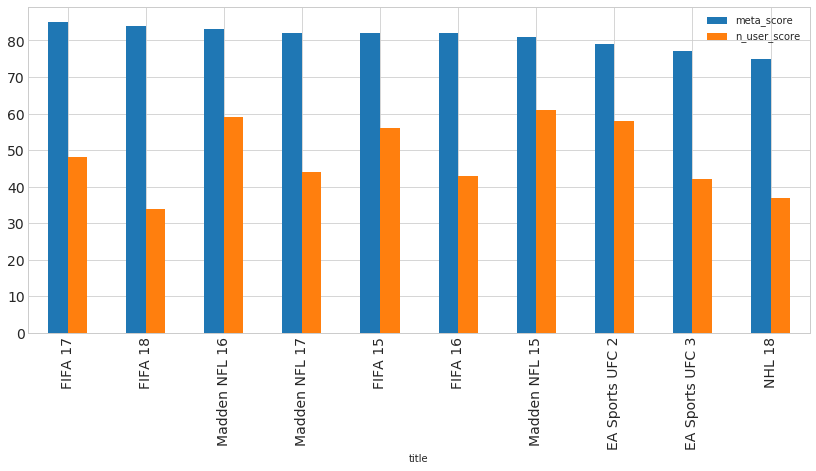

In [165]:
ea = ps4.loc[ps4['developer'] == 'EA Sports', ['title', 'meta_score', 'n_user_score']].sort_values('meta_score', ascending=False)[:10]
ea.set_index('title').plot.bar(figsize=(14, 6));

__Who are the top 10 developers whose titles are on average more underrated by metacritic (at least 4 released titles)?__

In [175]:
dev.loc[dev['count'] >= 4].sort_values('dif_avg')[:10]

,dif_avg,count
HB Studios Multimedia,-8.000000,4
Acquire,-7.750000,4
SuperMassive Games,-5.800000,5
Compile Heart,-5.250000,4
CyberConnect2,-5.200000,5
Gust,-5.000000,4
PlatinumGames,-3.600000,5
DONTNOD Entertainment,-3.333333,6
Media Vision,-2.750000,4
Deck Nine Games,-2.750000,4


In [176]:
ps4.loc[ps4['developer'] == 'HB Studios Multimedia', 'title'].reset_index(drop=True)

0    Mark McMorris Infinite Air
1                      Rugby 15
2          Rugby World Cup 2015
3                 The Golf Club
Name: title, dtype: object

In [177]:
ps4.loc[ps4['developer'] == 'Acquire', 'title'].reset_index(drop=True)

0    Aegis of Earth: Protonovus Assault
1                          Akiba's Beat
2      Akiba's Trip: Undead & Undressed
3                 No Heroes Allowed! VR
Name: title, dtype: object

### Ratings

__How many titles per rating category?__

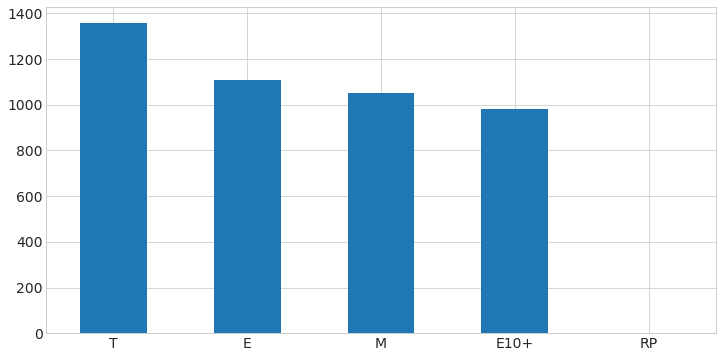

In [144]:
df['rating'].value_counts().plot.bar(figsize=(12, 6), rot=0);

E: Everyone
<br/>E+10: Everyone +10
<br/>T: Teen +13
<br/>M: Mature +17

__Which console is more "family" oriented?__

In [77]:
qty = df.loc[(df['rating'].isnull() == False) & (df['rating'] != 'RP')].groupby('platform')['title'].count()
#((df.loc[df['rating'] != 'RP'].groupby(['platform', 'rating'])['title'].count().unstack().transpose() / qty) * 100).plot.bar(figsize=(12, 6), rot=0);
rat = (df.loc[df['rating'] != 'RP'].groupby(['platform', 'rating'])['title'].count().unstack().transpose() / qty) * 100
rat = rat[['PlayStation 4', 'Xbox One', 'Switch']]

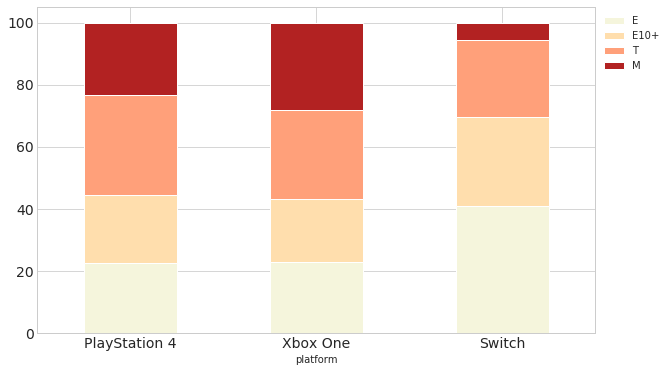

In [106]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1, 1, 1)
rat.iloc[0].plot.bar(ax=ax, color='beige', edgecolor='white', label=rat.index[0]);
rat.iloc[1].plot.bar(ax=ax, bottom=rat.iloc[0], color='navajowhite', edgecolor='white', label=rat.index[1]);
rat.iloc[3].plot.bar(ax=ax, bottom=rat.iloc[:2].sum().values, color='lightsalmon', edgecolor='white', label=rat.index[3]);
rat.iloc[2].plot.bar(ax=ax, bottom=(rat.iloc[:2].sum() + rat.iloc[3]).values, color='firebrick', edgecolor='white', label=rat.index[2], rot=0);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1);

Switch has in proportion more games suited for everyone

__Which category has the best games ?__

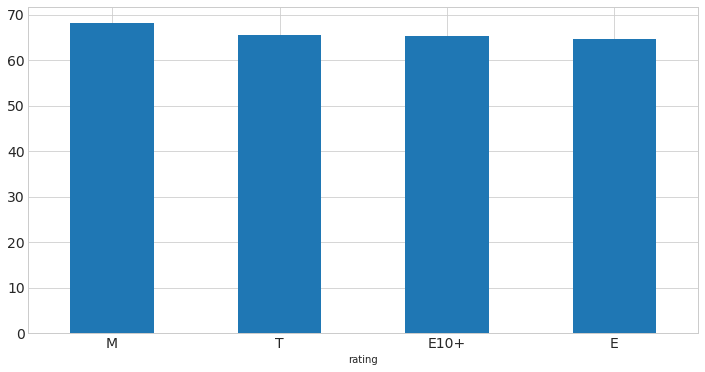

In [147]:
tmp.loc[(tmp['rating'].isnull() == False) & (tmp['rating'] != 'RP')].groupby('rating')['n_user_score'].mean().sort_values(ascending=False).plot.bar(figsize=(12, 6), rot=0);

Mature category seems to has an advantage